In [179]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Has the network latency gone up since we switched internet service providers?

- Null Hypothesis:
H0 = There is no difference in network latency since internet provider switch
- Alternative Hypothesis: 
Ha = Network latency has increased 10% since internet provider switch

- True Positive: Network latency has increased 10% since the internet provider switch
- True Negative: Network latency has not changed since the internet provider switch

- Type I error (False Positive): Network latency has increased 20% since the internet provider switch, but actually there is no difference in network latency since the internet provider switch

- Type II error (False Negative): Network latency has not changed since the interenet provider switch, but actually network latency has increased 10% since the internet provider switch

# Is the website redesign any good?

- Null Hypothesis:
H0 = There is no difference in web traffic since the website design

- Alternative Hypothesis: 
Ha = There has been a 10% increase in web traffic since the website design

- True Positive: There has been a 10% increase in web traffic since the website design
- True Negative: There has not been a web traffic difference since the website design

- Type I error (False Positive): There has been a 20% increase in web traffice since the website design, but actually there has been no difference since the website design
- Type II error (False Negative): There has not been a web traffic difference since the website design, actually there has been a 10% web traffic increase since the website design

# Is our television ad driving more sales?

- Null Hypothesis:
H0 = There is no difference in sales since the television ad launch

- Alternative Hypothesis: 
Ha = There has been a 10% increase in sales since the television ad launch

- True Positive: There has been a 10% increase in sales since the television ad launch
- True Negative: There has not been a difference in sales since the television ad launch 

- Type I error (False Positive): There has been a 20% increase in sales since the television ad launch, but there has actually not been a difference in sales since the television ad launch 
- Type II error (False Negative): There has not been a difference in sales since the television ad launch, but there has actually been a 10% increase in sales since the television ad launch

# T-Test Questions

In [180]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05


# Question 1
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- EAST = A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
-  WEST = A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- we will use a 2 sample t test (bc we want to compare the average time it takes to sell homes for it's two offices)
- we will use a 2 tailed test bc Ha = significant difference

What are we comparing? 
- Average time (numeric continuous values) to sell for two different groups (categories)
- One sample or two sample?
- One tailed ot two tailed? 

**B. Set Hypothesis**

$H_{0}$: Mean of a home sales = Mean of b home sales 
$H_{a}$: Mean of a home sales > Mean of b home sales

**C. Set Alpha**

alpha = 0.05

In [20]:
# normal distribution = yes (over 30 samples)
# independent samples = yes
# equal variences = ? TBD
a_mean = 90
a_stddev = 15
a_pop = 40
b_mean = 100
b_stddev = 20
b_pop = 50

sitea = np.random.normal(a_mean, a_stddev, 10000)
siteb = np.random.normal(b_mean, b_stddev, 10000)

alpha = 0.05

In [21]:
sitea.var(), siteb.var()

(229.4177312619196, 406.6535210616357)

In [22]:
t, p = stats.ttest_ind(sitea, siteb, equal_var = False)

In [23]:
t, p, alpha

(-40.10017589437507, 0.0, 0.05)

In [29]:
# Is the probability greater than the alpha?
p/2 < alpha

True

In [30]:
# Is there a significant difference noted in the ttest between the two houses 
# and their speed to sell homes when compared

t > 0

False

In [31]:
sitea = np.random.normal(a_mean, a_stddev, a_pop)
siteb = np.random.normal(b_mean, b_stddev, b_pop)

In [28]:
sitea, siteb

(array([ 92.506457  ,  89.85912847,  80.82095642,  88.51406834,
         95.30702254, 104.65310615,  94.38400738,  78.16838384,
         80.65417589,  76.30409913,  90.97242254,  85.98720274,
         95.28715169,  59.19507659,  81.46549936,  78.74292025,
        104.15872046,  77.32620534,  91.92964789,  97.48149331,
         65.18698406,  96.08221934,  85.78224727,  90.95574022,
         63.28703472,  78.70287696,  77.99517449,  66.97526917,
         97.51680136, 102.68619726, 103.0051798 ,  78.98266131,
         76.92105125,  87.73431489,  90.45683205, 100.94852528,
         52.51033773,  65.94525324,  80.23819807,  87.29231938]),
 array([104.49568203, 134.22178122,  80.26293754, 124.94530658,
        102.88189058,  91.24534831,  98.177939  , 104.81778527,
         81.68977311, 124.72636282, 125.17459398, 137.42815516,
         79.18922217, 140.97607042, 112.59450393, 107.57440291,
        129.78337065,  97.35011363,  98.70157696,  94.2572725 ,
        107.31207129,  60.50270088, 11

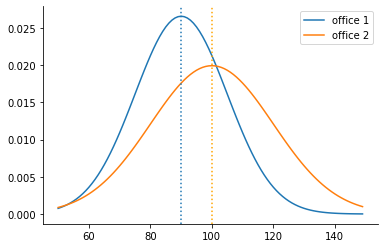

In [183]:
# Other version to viualize two distributions: 

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [184]:
# Using Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

α = 0.05
t, p = stats.ttest_ind_from_stats(90, 15,40,100,20,50, equal_var= False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [185]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis


# Question 2

- Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [173]:
from pydataset import data

In [186]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [187]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

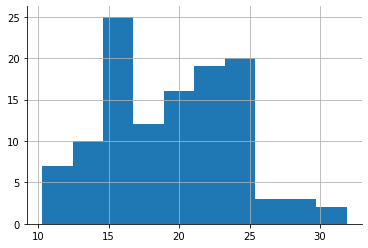

In [188]:
# plot distribution for fe_2008
fe_2008.hist()

<AxesSubplot:>

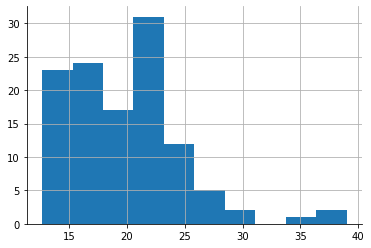

In [189]:
# plot distribution for fe_1999
fe_1999.hist()

In [190]:
# how many observations do I have for each sample? N > 30 is normal
fe_2008.count(), fe_1999.count() 

(117, 117)

In [191]:
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [192]:
# stats Levene test - retruns the p value, small p-value means unequal variances
# stats.levene(fe_2008, fe_1999)
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [193]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [195]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [196]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

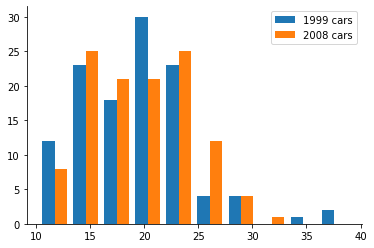

In [197]:
plt.hist([fe_1999, fe_2008], label = ['1999 cars', '2008 cars'])
plt.legend(loc="upper right")

2. Are compact cars more fuel-efficient than the average car?
Comparing fuel economy of one group with population mean (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and p/2 < 0.05

# 2. Are compact cars more fuel-efficient than the average car?
- H0: Compact cars fuel-efficiency = average car fuel-efficiency
- Ha: Compact car fuel-efficiency > average car fuel-efficiency

    for Ha to be true, t>0 and p/2 <0.05

In [215]:
mpg['transmission'] = np.where(mpg.trans.str.count('auto'), 'automatic', 'manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmission_type,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission,automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,Auto Transmission,automatic
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,Manual Transmission,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,Auto Transmission,automatic
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,Manual Transmission,manual


In [199]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

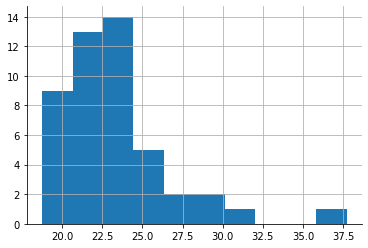

In [200]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

fe_compact.hist()

In [201]:
#calculate t and p values: 
t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [202]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



#  3. Do manual cars get better gas mileage than automatic cars?
- One-sample or two-sample t test?
- 1-tailed or 2-tailed?
$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars
$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [203]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

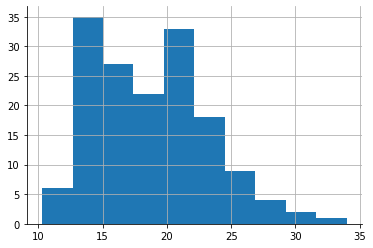

In [204]:
#distribution
fe_auto.hist()

<AxesSubplot:>

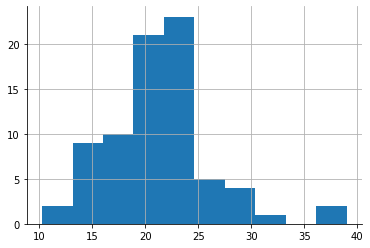

In [205]:
#distribution
fe_manual.hist()

In [206]:
# looking at the variances
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [207]:
# # # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [208]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = False)
t, p/2, alpha

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [209]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [213]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

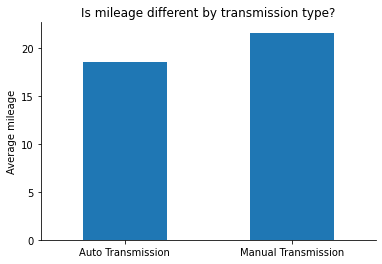

In [214]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')